<a href="https://colab.research.google.com/github/singhsourav0/Deep-Learning-Odyssey/blob/main/9_dropout_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="background-color: #ffeeba; padding: 10px;">
  <p style="color: #856404;"><b>Dropout Layers in ANN for Regression</b></p>
  <p style="color: #856404;">Dropout layers are a regularization technique used in Artificial Neural Networks (ANN) to prevent overfitting. During training, a certain percentage of neurons in the layer are randomly ignored or "dropped out". This forces the network to learn redundant representations of data, leading to a more robust and generalized model.</p>
  <p style="color: #856404;">Implementation of Dropout in Keras:</p>
  <pre style="color: #856404;">from keras.layers import Dropout

# Add a dropout layer with a dropout rate of 0.2 (20% of neurons will be randomly dropped during training)
model.add(Dropout(0.2))</pre>
  <p style="color: #856404;"><b>Why Use Dropout?</b></p>
  <p style="color: #856404;">1. <b>Prevent Overfitting:</b> Dropout helps prevent the model from memorizing noise in the training data by introducing noise during training.</p>
  <p style="color: #856404;">2. <b>Improves Generalization:</b> By learning multiple independent representations of the data, dropout improves the generalization ability of the model.</p>
  <p style="color: #856404;">When Does a Model Transition from Overfitting to Underfitting?</p>
  <p style="color: #856404;">A model transitions from overfitting to underfitting when it starts to perform poorly on both the training and validation datasets. Overfitting occurs when the model learns to memorize the training data too well, leading to poor performance on unseen data. Underfitting occurs when the model is too simple to capture the underlying patterns in the data, resulting in poor performance on both training and validation data.</p>
</div>


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate Data

In [2]:
X_train = np.linspace(-1, 1, 20)

In [3]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  ,
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475,
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [4]:
X_test = np.linspace(-1, 1, 20)

In [5]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

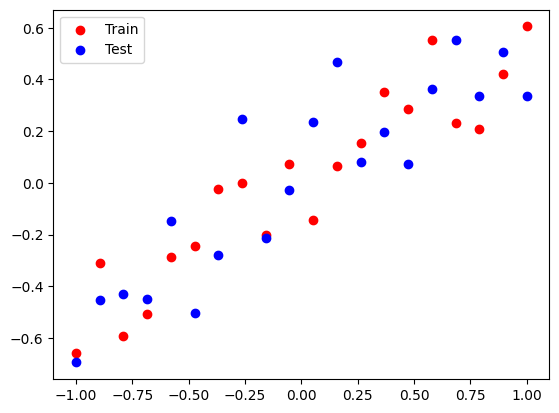

In [6]:
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.legend()
plt.show()

# Regression Model

In [7]:
model_1 = Sequential()
model_1.add(Dense(128, input_dim=1, activation="relu"))
model_1.add(Dense(128, activation="relu"))
model_1.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_1.compile(loss='mse', optimizer=adam, metrics=['mse'])
history = model_1.fit(X_train, y_train, epochs=500,
                    validation_data = (X_test, y_test),
                    verbose=False)

In [8]:
# evaluate the model
_, train_mse = model_1.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_1.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.0027097316924482584, Test: 0.044468529522418976


In [9]:
y_pred_1 = model_1.predict(X_test)

1/1 [==============================] - 0s 73ms/step


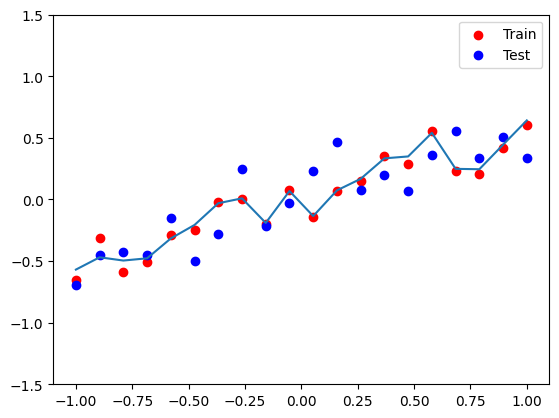

In [10]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_1)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

# Dropout Model

In [11]:
model_2 = Sequential()
model_2.add(Dense(128, input_dim=1, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])

drop_out_history = model_2.fit(X_train, y_train, epochs=500,
                               validation_data = (X_test, y_test),
                               verbose=False)

In [12]:
# evaluate the model
_, train_mse = model_2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_2.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.01154681108891964, Test: 0.03781398758292198


In [13]:
y_pred_2 = model_2.predict(X_test)

1/1 [==============================] - 0s 47ms/step


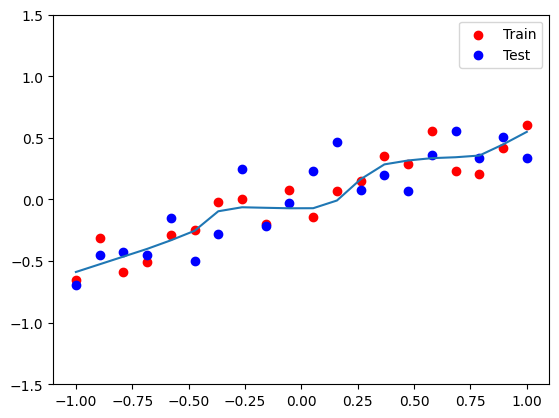

In [14]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

check our model to increase the value of p to decrease overfit.

In [16]:
model_2 = Sequential()
model_2.add(Dense(128, input_dim=1, activation="relu"))
model_2.add(Dropout(0.5))
model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.5))
model_2.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])

drop_out_history = model_2.fit(X_train, y_train, epochs=500,
                               validation_data = (X_test, y_test),
                               verbose=False)

In [17]:
# evaluate the model
_, train_mse = model_2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_2.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.014257693663239479, Test: 0.03608620911836624


In [18]:
y_pred_2 = model_2.predict(X_test)

1/1 [==============================] - 0s 101ms/step


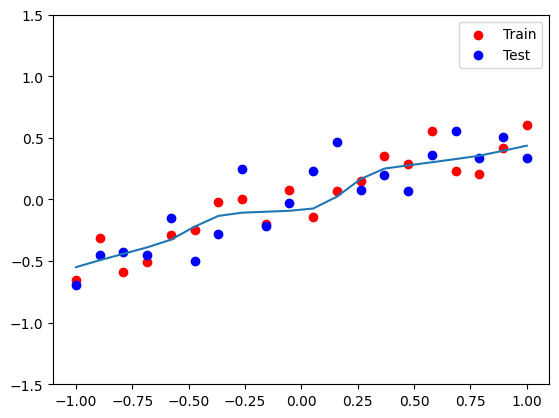

In [19]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()